# 基于CNN模型的物体识别

## 回答以下理论题目?

### 1.1. Suppose your input is a 100 by 100 gray image, and you use a convolutional layer with 50 filters that are each 5x5. How many parameters does this hidden layer have (including the bias parameters)? 

In [23]:
(5*5+2+1)*50     

1400

### 1.2. What are "local invariant" and "parameter sharing" ?

Local invariant: 空间不变性，平移不变性，位置不变性（位置变化不影响识别这个代表物的特性）
Parameter sharing: 参数共享（同一个Feature Map中神经元权值共享，该Feature Map中的所有神经元使用同一组权值）。减少了参数数量

### 1.3. Why we use batch normalization ?

加快训练速度，能够增大学习率，及时小的学习率也能够有快速的学习速率;不用考虑拟合中的droupout、L2 正则化项的参数选择; 
可以吧训练数据集打乱，防止训练发生偏移

### 1.4. What problem does dropout try to solve ?

过拟合的问题，模型泛化能力的问题，鲁棒性

## 2. 实践题

### 2.1 In the first session of the practical part, you will implement an image classification model using any deep learning libraries that you are familiar with,  which means, except for tensorflow and keras, you can also use pytorch/caffe/... .  The dataset used in this session is the cifar10 which contains 50000 color (RGB) images, each with size 32x32x3.  All 50000 images are classified into ten categories. 

In [24]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [25]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

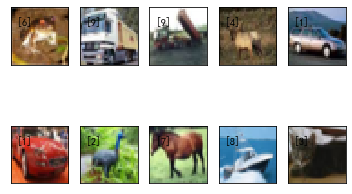

In [26]:
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(x_train[i-1])
    plt.text(3,10,str(y_train[i-1]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [27]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD, Adam

In [28]:
x_train1 = x_train/255
y_train1 = keras.utils.to_categorical(y_train) 
#to_categorical就是将类别向量转换为二进制（只有0和1）的矩阵类型表示。其表现为将原有的类别向量转换为独热编码的形式
x_test1 = x_test/255
y_test1 = keras.utils.to_categorical(y_test)

In [29]:
#model = Sequential()
##一层卷积层，包含了16个卷积核，大小为3*3
#model.add(Conv2D(16, (3, 3), activation='relu',padding='same',input_shape=x_train.shape[1:]))
#model.add(BatchNormalization())
#model.add(Activation('relu'))
#model.add(Conv2D(32, (3, 3)))
#model.add(BatchNormalization())
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
#
#model.add(Conv2D(64, (3, 3), padding='same'))
#model.add(BatchNormalization())
#model.add(Activation('relu'))
#model.add(Conv2D(64, (3, 3)))
#model.add(BatchNormalization())
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
#model.add(Flatten())
#model.add(Dense(256))
#
#model.add(BatchNormalization())
#model.add(Activation('relu'))
#model.add(Dropout(0.5))
#model.add(Dense(10))
#model.add(Activation('softmax'))
#
#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss='categorical_crossentropy', optimizer=sgd)
#
#model.fit(x_train1, y_train1, batch_size=16, epochs=10)
#score = model.evaluate(x_test1, y_test1, batch_size=16)

In [ ]:
model = Sequential()
#conv =>relu=>pool
#一层卷积层，包含了16个卷积核，大小为3*3
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3), padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
#一个最大池化层，池化大小为2*2
model.add(MaxPooling2D(pool_size=(2, 2)))
#遗忘层，遗忘速率为0.25
model.add(Dropout(0.25))

#(conv => relu)*2 =>pool
#添加一个卷积层，包含64个卷积核，每个卷积和仍为3*3
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Activation('relu'))
#来一个池化层
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))



#压平层
model.add(Flatten())
#来一个全连接层
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
#来一个遗忘层
model.add(Dropout(0.5))
#最后为分类层
model.add(Dense(10, activation='softmax'))

opt = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=["acc"])

model.fit(x_train1, y_train1, batch_size=16, epochs=20)
score = model.evaluate(x_test1, y_test1, batch_size=16)

Epoch 1/20
50000/50000 [==============================] - 17s 336us/step - loss: 1.7792 - acc: 0.3610
Epoch 2/20
50000/50000 [==============================] - 16s 325us/step - loss: 1.4917 - acc: 0.4666
Epoch 3/20
50000/50000 [==============================] - 16s 325us/step - loss: 1.3506 - acc: 0.5244
Epoch 4/20
50000/50000 [==============================] - 18s 356us/step - loss: 1.2527 - acc: 0.5604
Epoch 5/20
50000/50000 [==============================] - 17s 331us/step - loss: 1.0621 - acc: 0.6391
Epoch 10/20
50000/50000 [==============================] - 16s 324us/step - loss: 1.0438 - acc: 0.6467
Epoch 11/20
50000/50000 [==============================] - 16s 324us/step - loss: 1.0245 - acc: 0.6530
Epoch 12/20
50000/50000 [==============================] - 16s 324us/step - loss: 1.0036 - acc: 0.6582
Epoch 13/20
50000/50000 [==============================] - 16s 323us/step - loss: 1.0053 - acc: 0.6597
Epoch 14/20
19696/50000 [==========>...................] - ETA: 9s - loss: 0.9

In [ ]:
#这一行新加的，用于导入绘图包
from keras.utils import plot_model
plot_model(model,show_shapes=True)